In [1]:
"""
``autoreload`` is an IPython extension that reloads modules
automatically before executing the line of code typed.
"""

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
RAW_DATA_PATH = Path('__file__').resolve().parents[1] / 'data' / '01_raw'
PROCESSED_DATA_PATH = Path('__file__').resolve().parents[1] / 'data' / '02_processed'

In [4]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = [15, 8]

In [5]:
sns.set_style('whitegrid')

In [6]:
def read_and_format_csv(subfolder_path: Path, raw_path: bool = True) -> pd.DataFrame:
    if raw_path:
        path = str(RAW_DATA_PATH / subfolder_path)
        df = pd.read_csv(path)
    else:
        path = str(PROCESSED_DATA_PATH / subfolder_path)
        df = pd.read_csv(path)
        
    
    df = df.astype({col: 'float32' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close',]})
    df['stock_name'] = df['stock_name'].astype('str')
    df['Volume'] = df['Volume'].astype('int32')

    df['Date'] = pd.to_datetime(df['Date'], format='ISO8601', utc='True')
    df['Date'] = pd.to_datetime(df['Date'].dt.date)
    return df

In [7]:
df = read_and_format_csv(subfolder_path='Information_Technology/AAPL.csv', raw_path=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,stock_name
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,AAPL
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,AAPL
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,AAPL
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,AAPL
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,AAPL


Make sure Dates are sorted

In [8]:
df.sort_values(by='Date', inplace=True)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,stock_name
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,AAPL
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,AAPL
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,AAPL
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,AAPL
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,AAPL


In [9]:
df.dtypes

Date          datetime64[ns]
Adj Close            float32
Close                float32
High                 float32
Low                  float32
Open                 float32
Volume                 int32
stock_name            object
dtype: object

## Notes about the dataset

<ul>
    <li>The currency used is American dollar</li>
    <li>Returns column (below) is percentage daily returns</li>
    <li>Datetime is based on american new york timezone</li>
    <li></li>
    <li></li>
</ul>

## Focusing on Daily resolution and returns

<Axes: xlabel='Date', ylabel='Close'>

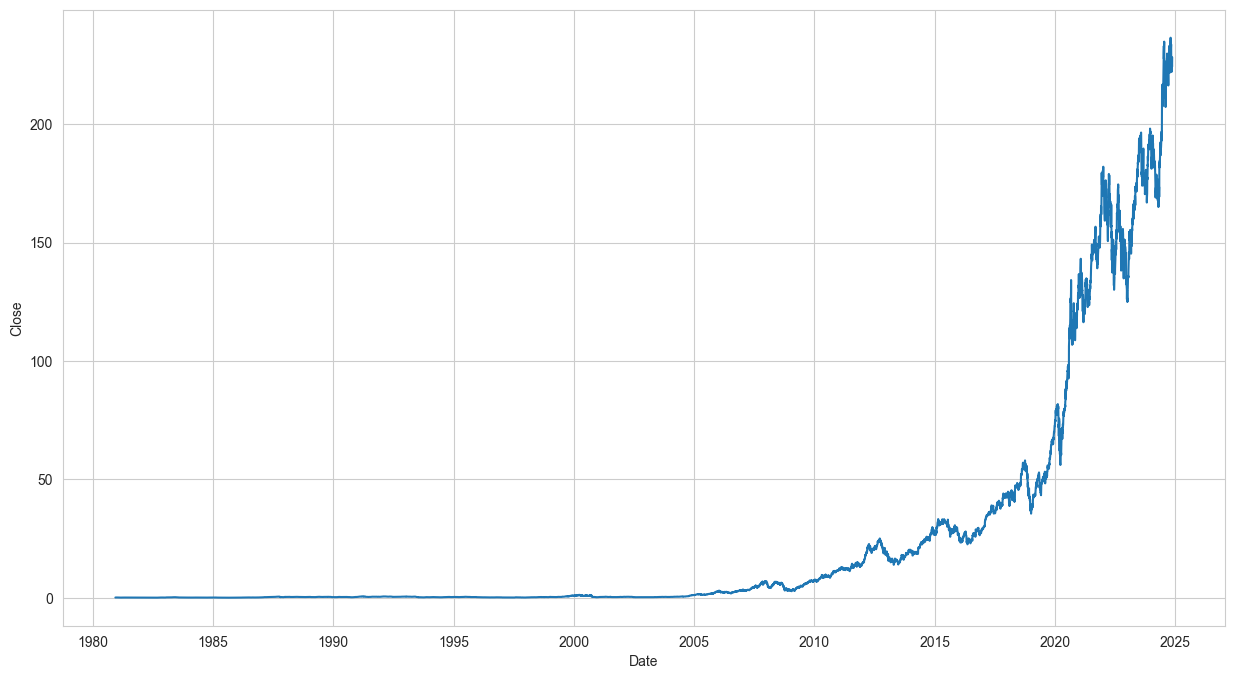

In [10]:
f, ax = plt.subplots(nrows=1, ncols=1,)

sns.lineplot(data=df, x='Date', y='Close', markers='o')

In [11]:
df['Returns'] = df['Adj Close'].pct_change()
df['first_diff'] = df['Adj Close'].diff()
df

,Date,Adj Close,Close,High,Low,Open,Volume,stock_name,Returns,first_diff
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,AAPL,NaN,NaN
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,AAPL,-0.052171,-0.005156
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,AAPL,-0.073397,-0.006876
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,AAPL,0.024751,0.002148
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,AAPL,0.028993,0.002579
...,...,...,...,...,...,...,...,...,...,...
11069,2024-11-08,226.960007,226.960007,228.660004,226.410004,227.169998,38328800,AAPL,-0.001188,-0.269989
11070,2024-11-11,224.229996,224.229996,225.699997,221.500000,225.000000,42005600,AAPL,-0.012029,-2.730011
11071,2024-11-12,224.229996,224.229996,225.589996,223.360001,224.550003,40398300,AAPL,0.000000,0.000000
11072,2024-11-13,225.119995,225.119995,226.649994,222.759995,224.009995,48566200,AAPL,0.003969,0.889999


Stock market contains less data points for 1980 so we start at 1981

In [12]:
df = df.loc[df['Date'].dt.year > pd.Timestamp('1980').year].reset_index(drop=True)
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,stock_name,Returns,first_diff
0,1981-01-02,0.118602,0.154018,0.155134,0.154018,0.154018,21660800,AAPL,0.010989,0.001289
1,1981-01-05,0.116024,0.150670,0.151228,0.150670,0.151228,35728000,AAPL,-0.021738,-0.002578


In [13]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Date,Adj Close,Close,High,Low,Open,Volume,Returns,first_diff
count,11061,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,1.106100e+04,11061.000000,11061.000000
mean,2002-11-30 02:56:32.026037376,22.893742,23.732557,23.969788,23.473480,23.716425,3.025108e+08,0.001077,0.020622
min,1981-01-02 00:00:00,0.037815,0.049107,0.049665,0.049107,0.049665,-2.108338e+09,-0.518692,-10.566132
10%,1985-05-16 00:00:00,0.103992,0.134487,0.137277,0.132813,0.135045,6.835660e+07,-0.028096,-0.176617
25%,1991-12-09 00:00:00,0.243658,0.300781,0.306429,0.292411,0.300223,1.110652e+08,-0.012620,-0.008989
50%,2002-11-25 00:00:00,0.442485,0.540179,0.549107,0.531250,0.540179,2.030448e+08,0.000000,0.000000
75%,2013-11-19 00:00:00,17.913139,20.999643,21.236429,20.821428,21.079287,3.933552e+08,0.014385,0.014069
90%,2020-06-24 00:00:00,87.711876,90.014999,91.250000,88.254997,90.019997,7.011536e+08,0.030815,0.261644
99%,2024-06-08 04:48:00,197.054633,198.020004,198.887994,195.934000,197.151996,1.504470e+09,0.077555,3.431161
max,2024-11-14 00:00:00,236.220108,236.479996,237.490005,234.449997,236.479996,2.127171e+09,0.332281,13.998383


In [14]:
df.dropna(inplace=True)

<Axes: xlabel='Returns', ylabel='Count'>

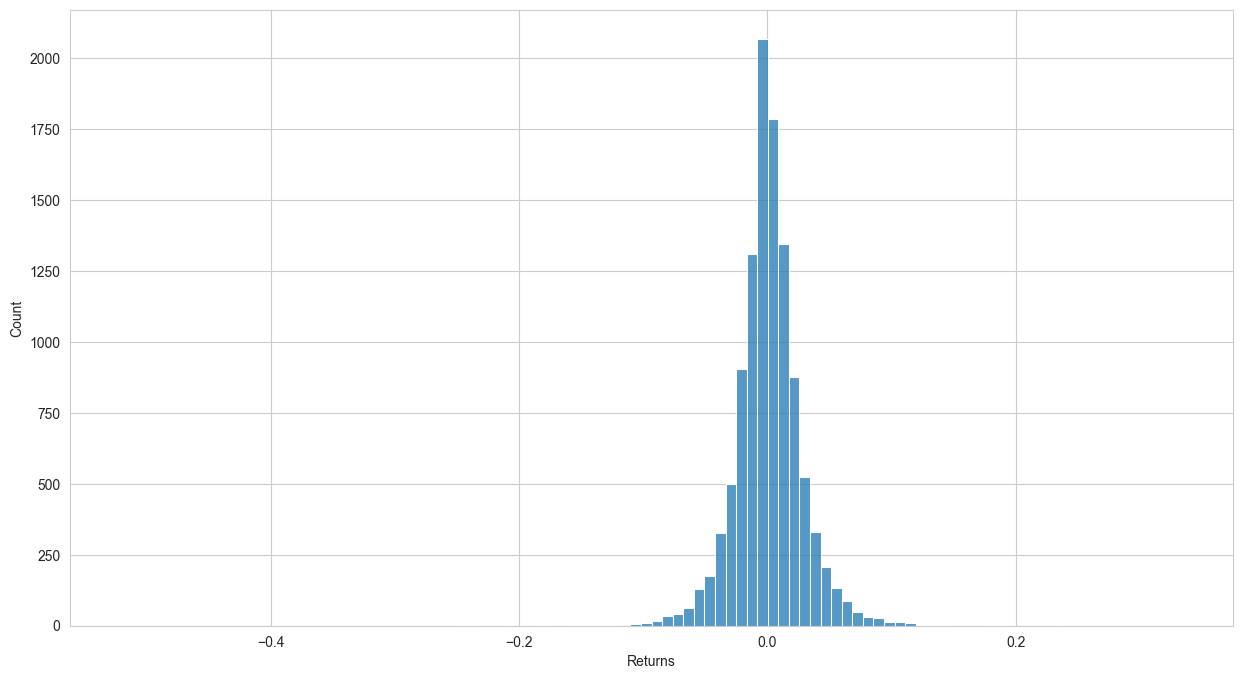

In [15]:
sns.histplot(df['Returns'], bins=100)

<font color='orange' size=5>The percentage returns are normally distributed so we want to explore events more than 3 std away from mean to find out when these abnormal events occurred </font>

In [16]:
pct_mean = df['Returns'].mean()
pct_std = df['Returns'].std()

# Calculate z-score
z_score = np.abs((df['Returns'] - pct_mean) / pct_std)

# Find outliers (values more than n_std standard deviations away)
outliers = df[['Date', 'Returns']][z_score > 3]
outliers['Year'] = outliers['Date'].dt.year

In [17]:
outliers

,Date,Returns,Year
63,1981-04-02,0.087632,1981
185,1981-09-25,-0.129776,1981
306,1982-03-19,0.090173,1982
478,1982-11-22,-0.089070,1982
483,1982-11-30,0.103898,1982
...,...,...,...
9884,2020-03-16,-0.128647,2020
9890,2020-03-24,0.100325,2020
9899,2020-04-06,0.087237,2020
9980,2020-07-31,0.104689,2020


<font color=orange size=5>Hypothesis: Lots of abnormal negative returns during recessions and positive after recessions</font> <br>
Inconclusive with hourly resolution

In [18]:
abnormal_positive_change = outliers.loc[outliers['Returns'] > 0]
abnormal_negative_change = outliers.loc[outliers['Returns'] < 0]

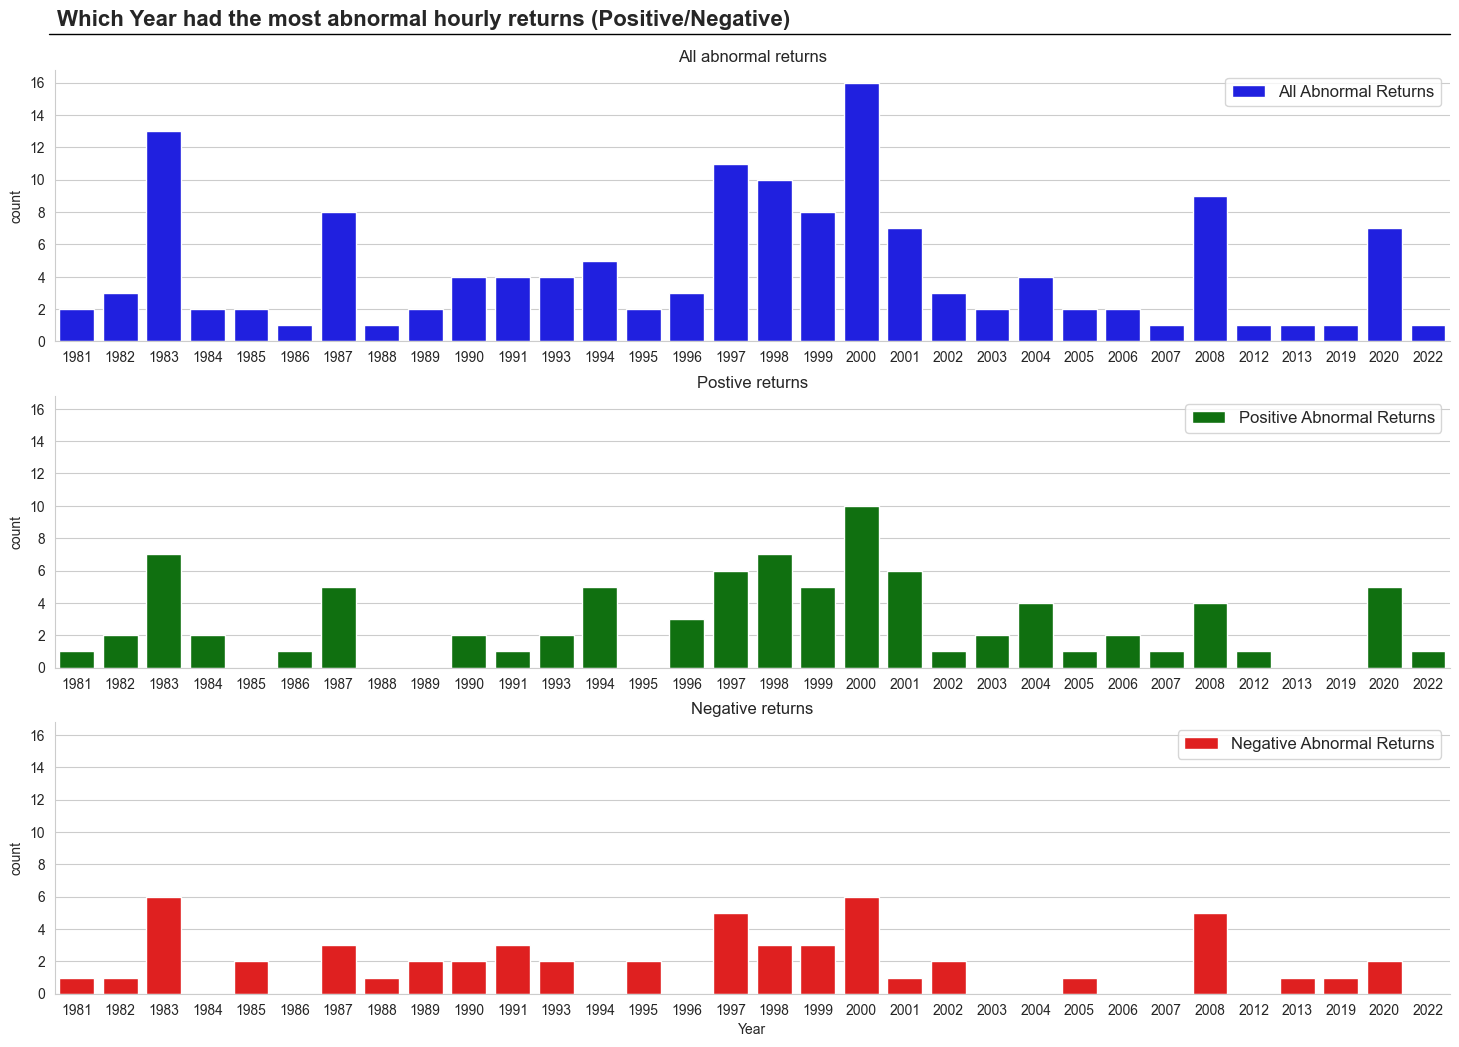

In [19]:
f, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(18, 12))

sns.countplot(data=outliers, x='Year', color='blue', ax=ax[0], label='All Abnormal Returns')
sns.countplot(data=abnormal_positive_change, x='Year', color='green', ax=ax[1], label='Positive Abnormal Returns')
sns.countplot(data=abnormal_negative_change, x='Year', color='red', ax=ax[2], label='Negative Abnormal Returns')

for i, title in enumerate(['All abnormal returns', 'Postive returns', 'Negative returns']):
    ax[i].xaxis.set_tick_params(which='both', labelbottom=True)
    ax[i].set_title(title)
    ax[i].set_xlabel('Year')
    ax[i].legend(loc=0, fontsize=12)
    
sns.despine()
dx, dy = 0.33, 0.93
f.suptitle(t='Which Year had the most abnormal hourly returns (Positive/Negative)', fontsize=16, x=dx, y=dy, weight='bold')
f.add_artist(plt.Line2D([0.122, 0.9], [0.91, 0.91], color='black', linewidth=1))




<Axes: xlabel='Date', ylabel='Returns'>

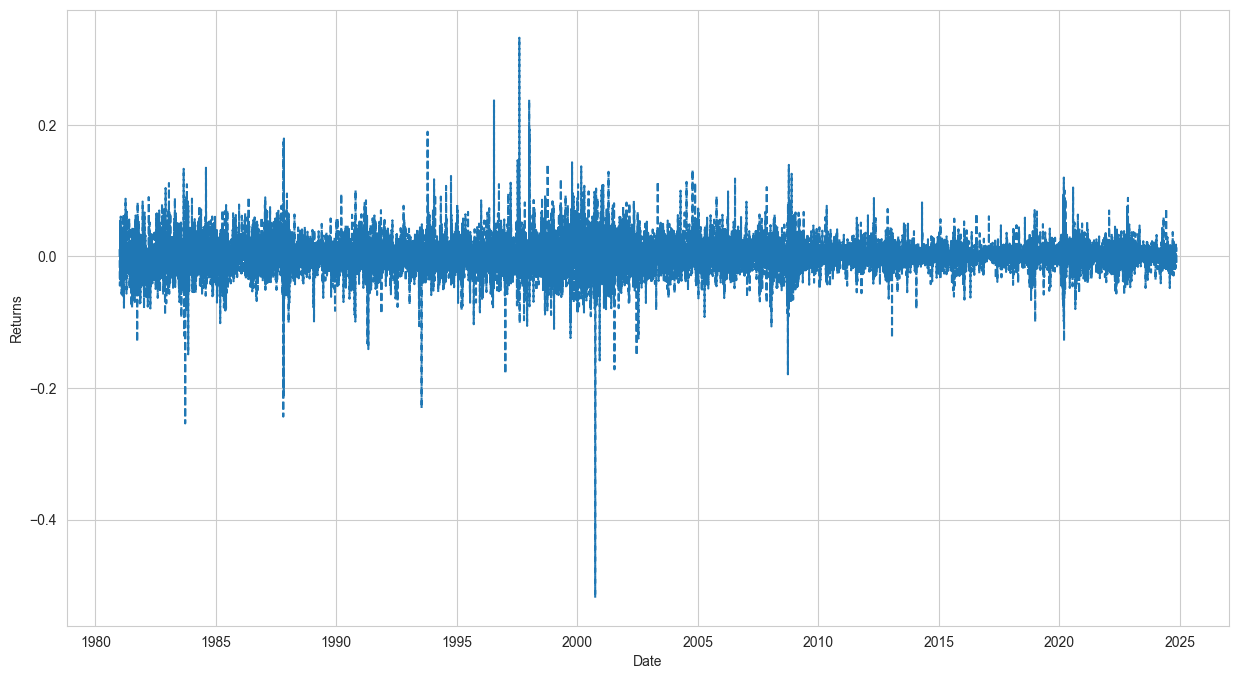

In [20]:
sns.lineplot(data=df, x='Date', y='Returns', linestyle='--', markers='o')

Variance changes so should i be concerned?

<Axes: xlabel='Date', ylabel='first_diff'>

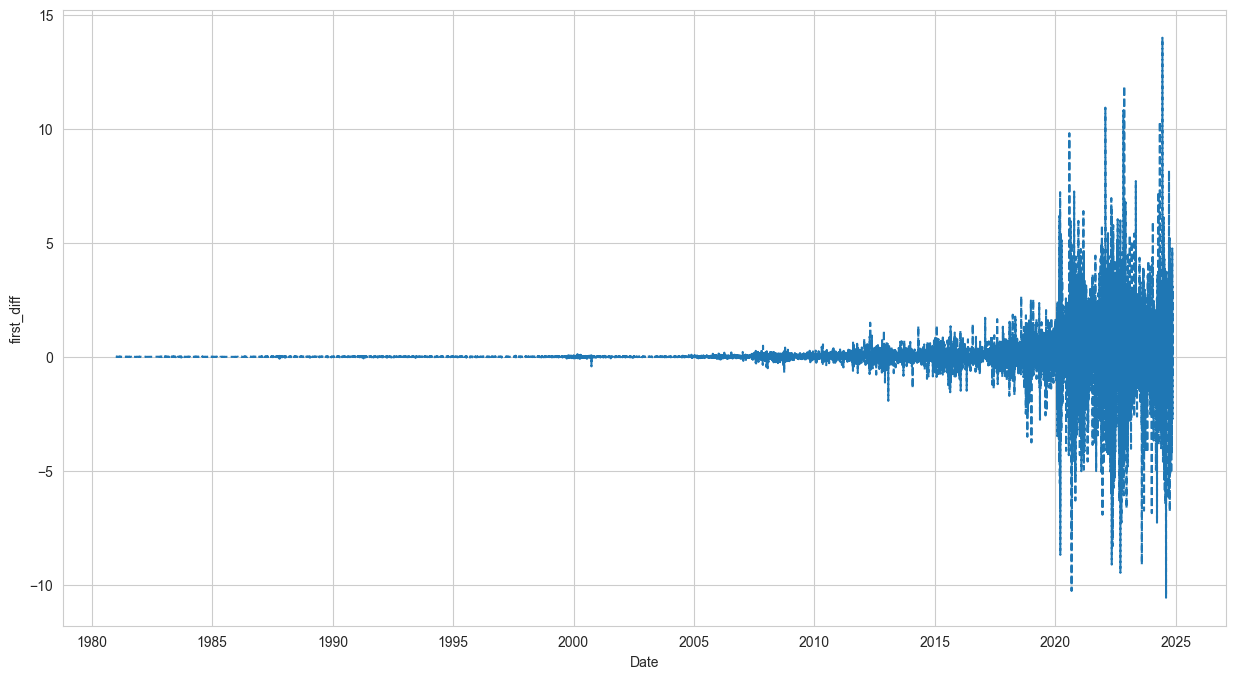

In [21]:
sns.lineplot(data=df, x='Date', y='first_diff', linestyle='--', markers='o')

---

Augmented Dickey Fuller Test

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# First Difference adj close results in really small p_value 3.5*10-30
results = adfuller(df['Returns'])
results

(np.float64(-30.002091222511435),
 0.0,
 11,
 11049,
 {'1%': np.float64(-3.4309419829743115),
  '5%': np.float64(-2.861801623995844),
  '10%': np.float64(-2.566909257329274)},
 np.float64(-47752.58355187107))

In [24]:
# pct change adj close results in p-value of 0
results = adfuller(df['Returns'])
results

(np.float64(-30.002091222511435),
 0.0,
 11,
 11049,
 {'1%': np.float64(-3.4309419829743115),
  '5%': np.float64(-2.861801623995844),
  '10%': np.float64(-2.566909257329274)},
 np.float64(-47752.58355187107))

---

split the data

In [25]:
df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,stock_name,Returns,first_diff
0,1981-01-02,0.118602,0.154018,0.155134,0.154018,0.154018,21660800,AAPL,0.010989,0.001289
1,1981-01-05,0.116024,0.150670,0.151228,0.150670,0.151228,35728000,AAPL,-0.021738,-0.002578


In [26]:
training = df.iloc[:, [0, -2]]
training.set_index('Date', inplace=True)
training

,Returns
Date,
1981-01-02,0.010989
1981-01-05,-0.021738
1981-01-06,-0.044448
1981-01-07,-0.042633
1981-01-08,-0.020241
...,...
2024-11-08,-0.001188
2024-11-11,-0.012029
2024-11-12,0.000000


---

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
p = 5
q = 5

model = ARIMA(training, order=(p,0,q))
results = model.fit()

d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                11061
Model:                 ARIMA(5, 0, 5)   Log Likelihood               23954.642
Date:                Mon, 25 Nov 2024   AIC                         -47885.285
Time:                        10:59:50   BIC                         -47797.551
Sample:                             0   HQIC                        -47855.735
                              - 11061                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      4.069      0.000       0.001       0.002
ar.L1          0.0077      0.073      0.107      0.915      -0.134       0.150
ar.L2         -0.0125      1.218     -0.010      0.9

In [30]:
results.resid

Date
1981-01-02    0.009913
1981-01-05   -0.022962
1981-01-06   -0.044907
1981-01-07   -0.043342
1981-01-08   -0.022812
                ...   
2024-11-08   -0.002357
2024-11-11   -0.012809
2024-11-12   -0.000167
2024-11-13    0.001974
2024-11-14    0.012245
Length: 11061, dtype: float64

Figure(1500x800)


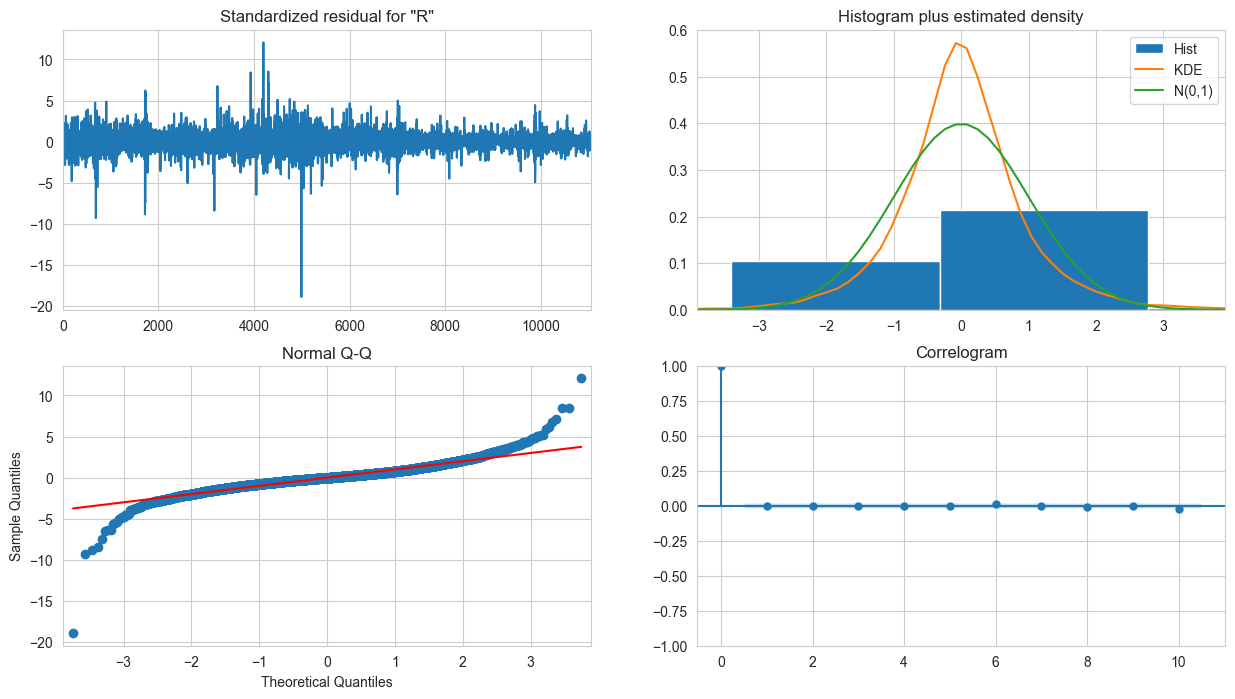

In [31]:
print(results.plot_diagnostics())

In [32]:
steps = -50
forecast = results.get_prediction(steps=steps)
mean_forecast = forecast.predicted_mean

In [33]:
confidence_intervals = forecast.conf_int()
confidence_intervals.columns

Index(['lower Returns', 'upper Returns'], dtype='object')

In [34]:
ploting = training.iloc[:, :]

In [35]:
ploting['Returns'].values

array([ 0.01098895, -0.02173805, -0.04444814, ...,  0.        ,
        0.00396919,  0.01377046], dtype=float32)

In [36]:
confidence_intervals.head(2)

,lower Returns,upper Returns
Date,,
1981-01-02,-0.053374,0.055526
1981-01-05,-0.053220,0.055668


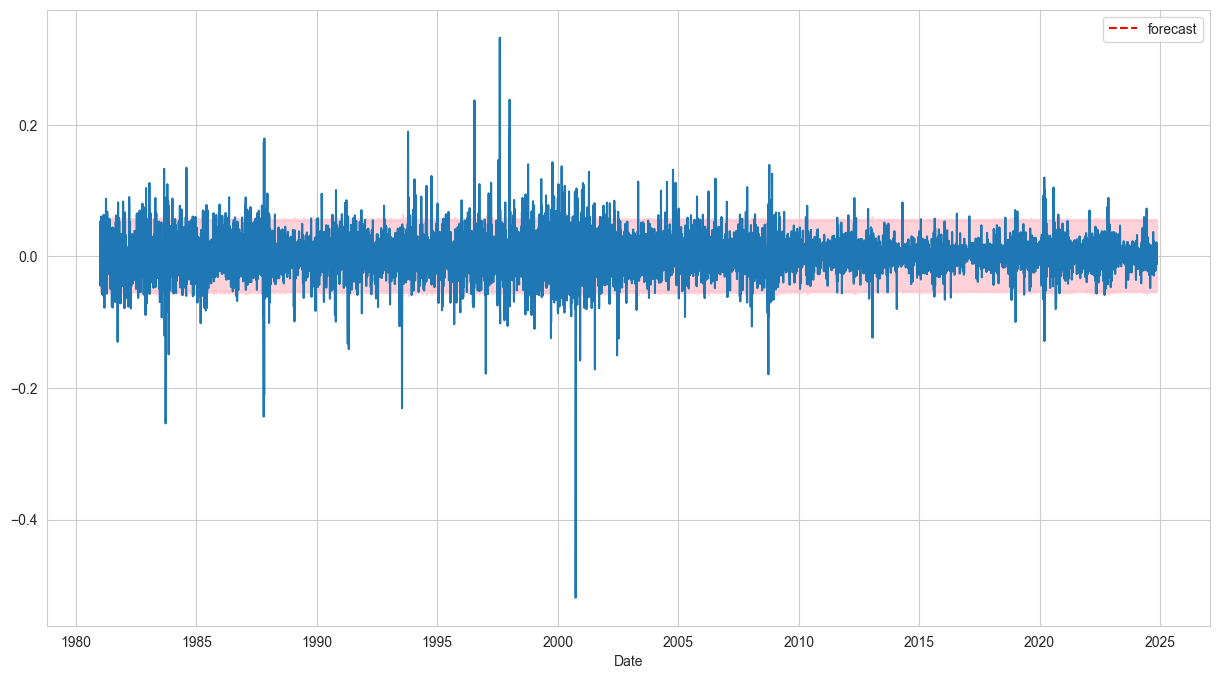

In [37]:

plt.figure()

sns.lineplot(x=mean_forecast.index, y=mean_forecast.values, color='red', label='forecast', linestyle='--')
sns.lineplot(x=ploting.index, y=ploting['Returns'].values)

plt.fill_between(x=confidence_intervals.index, y1=confidence_intervals['lower Returns'], y2=confidence_intervals['upper Returns'], color='pink', alpha=0.7)

plt.show()

---

In [38]:
training.index = pd.DatetimeIndex(training.index, freq='infer')
training.head(3)

,Returns
Date,
1981-01-02,0.010989
1981-01-05,-0.021738
1981-01-06,-0.044448


---

## Monthly Resolution and Returns

In [39]:
p = 1
q = 12

model = ARIMA(training, order=(p,0,q))
results = model.fit()

d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Miniconda\envs\data-dev\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                11061
Model:                ARIMA(1, 0, 12)   Log Likelihood               23966.575
Date:                Mon, 25 Nov 2024   AIC                         -47903.150
Time:                        11:00:02   BIC                         -47793.482
Sample:                             0   HQIC                        -47866.213
                              - 11061                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.913      0.000       0.001       0.002
ar.L1          0.3187      0.191      1.666      0.096      -0.056       0.693
ma.L1         -0.3050      0.191     -1.595      0.1

Figure(1500x800)


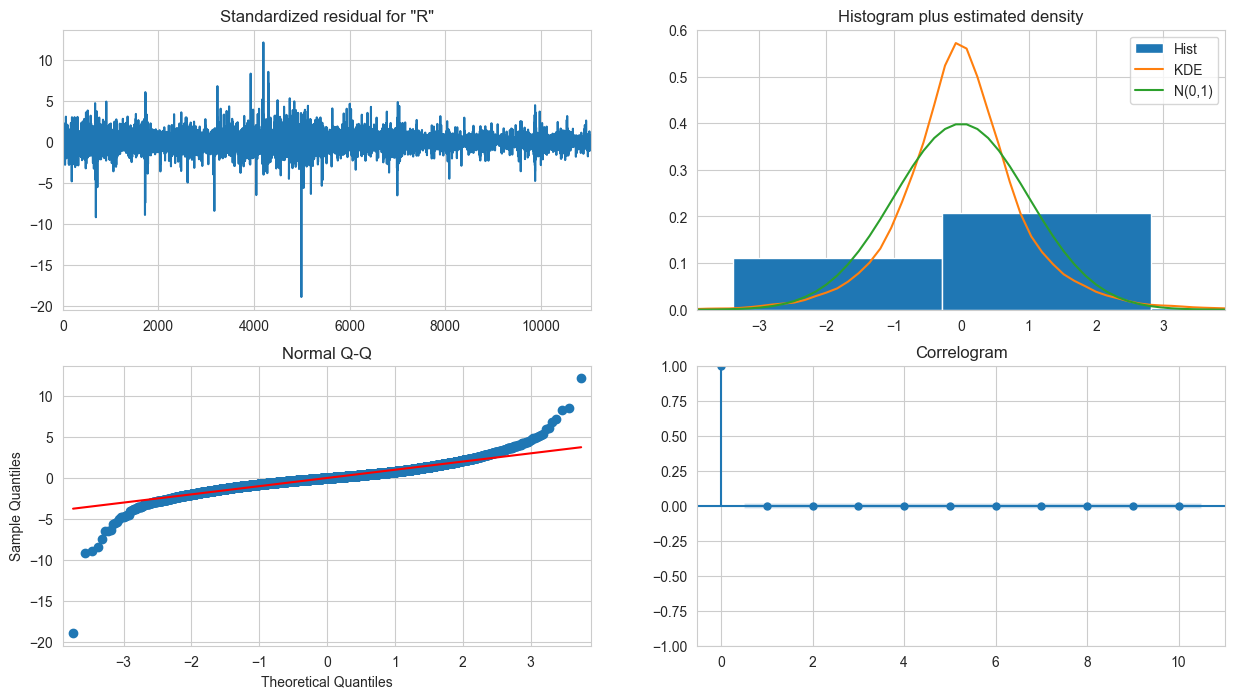

In [41]:
print(results.plot_diagnostics())

Good model corifident somewhat?

In [42]:
residuals = results.resid
mae = results.mae
rmse = np.sqrt(results.mse)
rmse, mae

(np.float64(0.027717203458994352), np.float64(0.01903602184180414))

---

Auto arima time